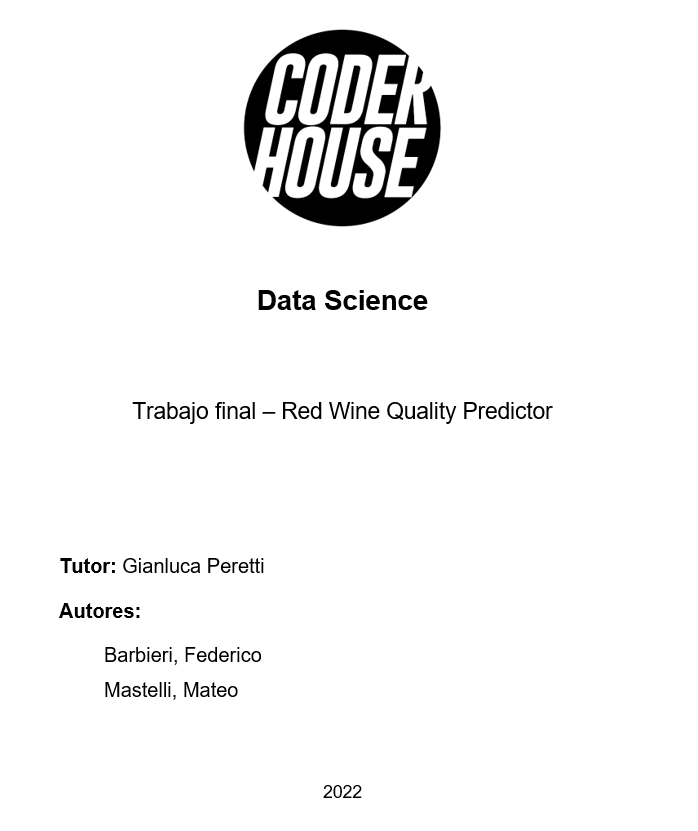

In [1]:
import pandas as pd # procesamiento de datos
import numpy as np # algebra lineal

#Importamos las librerias necesarias


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [2]:
df=pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Muestra de que no contamos con valores nulos para las features
df.isnull().mean()

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

# <font color='purple'>EDA

No es necesaria una limpieza de datos. Los análisis univariado, bivariado y multivariado fueron realizados, y se comentan a continuación:

In [27]:
#Análisis univariado
#Para realizar un análisis univariado, lo cual implica analizar cada variable independiente, 


print(df.shape)  #Cantidad de registros (filas, columnas)
print("----------------------------")
print(df.info()) #info basica del dataset
print("--------------------------------------------------------------------------------")
df.describe().T  
#La función "decribe" nos indica valores estadisticos sobre cada parámetro. transpuesta para una mejor lectura

(1599, 12)
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
--------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Concluimos que la variable target es "quality" que oscila con valores de 3 a 8 puntos. La media es de 5,64 de los 1599 vinos analizados (registros totales por campo). También se puede ver que ningún campo tiene datos faltantes con “df.count()”.

## Análisis bivariado

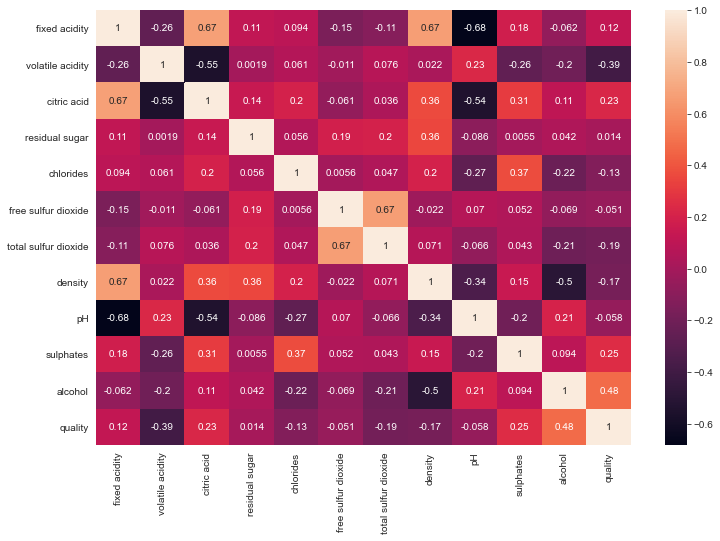

In [6]:
#Como primer análisis para ver cómo se relacionan de a pares todas las variables del dataset, podemos comenzar por observar que tan lineal es su relación.
#Para lograr esto ploteamos la siguiente matriz de correlación
plt.figure(figsize=(12, 8))

vg_corr = df.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);


Como conclusión, observamos que la única variable que tiene un poco de relación lineal con la variable objetivo "quality" es el nivel de alcohol con una correlación lineal de 0,48. El resto de las viarables, presenta correlaciones lineales bastante menores.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


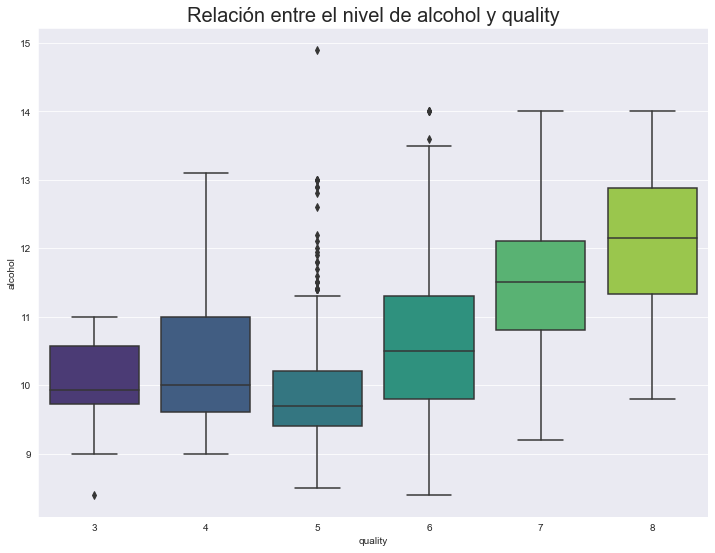

In [7]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(df['quality'], df['alcohol'], palette = 'viridis')
plt.title('Relación entre el nivel de alcohol y quality', fontsize = 20)
plt.show()

Del gráfico de boxplot se puede ver claramente porque estas dos variables tenian una correlación lineal elevada

Text(0.5, 1.0, 'Relacion entre free sulfur dioxide y quality')

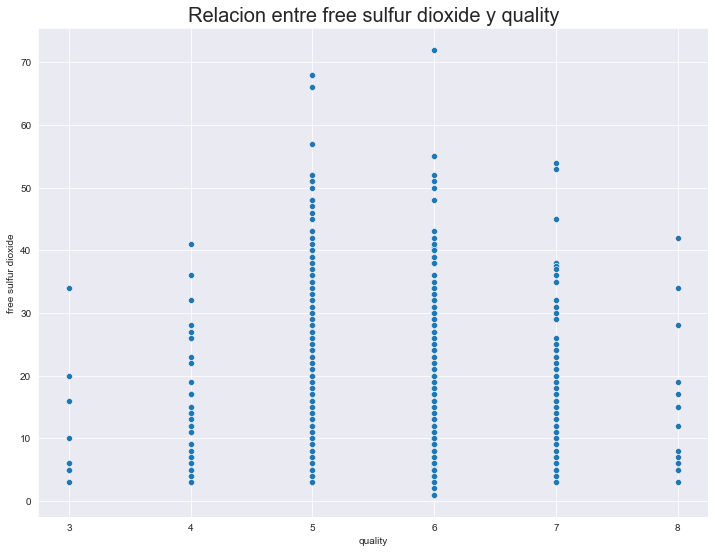

In [9]:
#A continuación analizaremos la realción de la variable target con la viariable "free sulfur dioxide" a través de un scatterplot para ver como es realmente su relación ya que su correlación lineal fue la mas baja de todo el dataset.
sns.scatterplot(x="quality", y="free sulfur dioxide", data=df)
plt.title('Relacion entre free sulfur dioxide y quality', fontsize = 20, fontweight = 30)

Debido a que la forma de gráfico se asemeja a una distribución normal es lógico que la correlación lineal sea prácticamente nula. Es importante no querdarse solo con información que nos provee una correlación lineal ya que nos perdemos de mucha información, por ejemplo, de este gráfico llegamos a la conclsuión de que los vinos tanto de mala como de buena calidad suelen tener bajos niveles de "free sulfur dioxide" por lo que tener un nivel alto de este parametro es un fuerte indicativo de que estamos en presencia de un vino de calidad intermedia 


# Analisis Multivariado

In [10]:
#Como parte del EDA (análisis de datos exploratorio) se realiza PCA (Análisis de componentes principales) para reducir la dimensionalidad
#de manera de limpiar y ordenar la información. Para poder realizar este analisis primero se debe normalizar la información

In [11]:
#Se define la variable x quitando la variable target (quality) del dataset : 
X = df.drop("quality", axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [12]:
y = df["quality"]
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [13]:
#la idea es centrar y escalar los datos con la libreria de SKLearn standard scaler -> fit_transform(data)
#según la teoria responde a la formula de varianza = ( (mediciones - media)^2 )/ numero de mediciones 
# al usar standard scaler el desvio estandar = 1 y la media = 0 (normalizamos el dataset)
scaled_data = StandardScaler().fit_transform(df)
scaled_data

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

In [14]:
#Utilizando PCA se puede reducir la dimensionalidad del dataset (son 12 con la target) para reducir el costo computacional de los algoritmos de predicción.
#Se propone utilizar las 3 variables pricipales las cuales continen la mayor varianza ergo, la mayor cantidad de información sobre el dataset
pca = PCA(n_components = 3)
pca.fit(scaled_data)

PCA(n_components=3)

[0.26009731 0.1868235  0.14024331]


Text(0, 0.5, 'Cumulative explained variance')

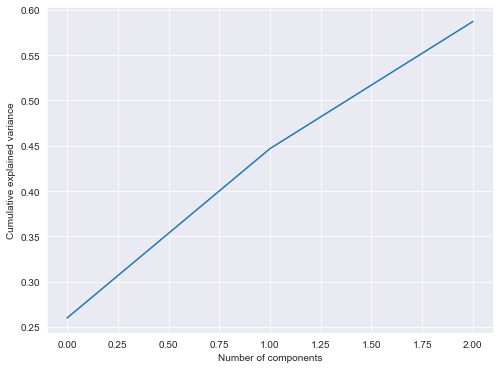

In [15]:
print(pca.explained_variance_ratio_)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


La suma de la varianza de las variables a utilizar en el PCA se recomienda que sume al menos 95% para poder aseguramos de estar utilizando casi la totalidad de la infomración que nos provee el dataset y de esta manera hacer predicciones confiables. En este caso se observa que dicha suma da aproximadamente 58% por lo que no tendria sentido utilizar PCA de esta manera. 

[0.26009731 0.1868235  0.14024331 0.10125174 0.0811053  0.05521602
 0.05152648 0.04215605 0.03427563 0.02732662 0.01501822]


Text(0, 0.5, 'Cumulative explained variance')

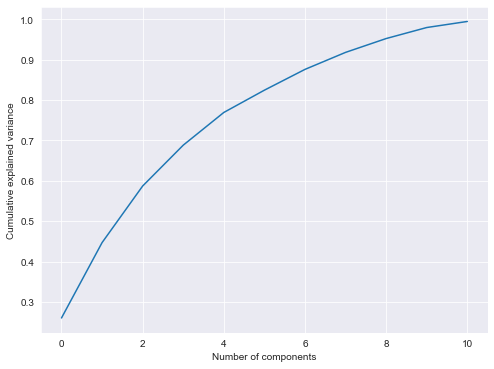

In [16]:
#Se pretende ahora analizar cual es la varianza de todas los componentes del nuevo espacio PCA
pca = PCA(n_components = 11)
pca.fit(scaled_data)
print(pca.explained_variance_ratio_)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

De este gráfico se deduce que para abarcar el 95% de la varianza se deberian utilizar las primeras 9 variables del PCA. Como la reducción en la dimensionalidad del dataset resulta casi nula no se le encuentra mucho sentido a aplicar PCA para trabajar con los algortimos de predicción por lo que trabajaremos con el dataset completo ya que este no cuenta con un número excesivo de features.
3Este probelma puede ser el resultado de que la información este uniformemente distribuida en el espacio respecto al 0 de coordenadas lo que genera que no haya una dirección predominanate en el nuevo espacio PCA que "condense" gran parte de la información" 

## Balanceo

A continuación analizamos como se distribuye la variable target

In [5]:
df['quality'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

Se observa que el dataset esta desbalanceado. Las calidades de 5 y 6 representan el 82% de los datos y si ademas a ese grupo se le suman los valores que poseen una calidad de 7 representan el 95% de los datos. Dada esta distribución actual de los datos  se genera que los algoritmos de predicción se sesguen y practicmanete ingnoren las categorias que tienen muy pocos datos para las predicciones futuras. 

Para solucionar este problema utilizamos sobremuestreo. El algoritmo de sobremuestro sintético SMOTE (Synthetic Minority Oversampling Technique)
sobremuestrea la clase minoritaria generando instancias sintéticas con el objetivo de equilibrarla con la
mayoritaria. Las nuevas instancias sintéticas se generan a través de la interpolación entre varias instancias
de clases minoritarias basándose en la regla del vecino más cercano.

In [8]:
from imblearn.over_sampling import SMOTE 
#Inicializo el método de sobremuestro
smote = SMOTE()

In [9]:
dataSmote, targetSmote= smote.fit_resample(df.drop(columns = "quality"),df["quality"])
dataSmote =dataSmote.assign(quality=targetSmote.values)
df= dataSmote

In [10]:
df['quality'].value_counts().sort_index()

3    681
4    681
5    681
6    681
7    681
8    681
Name: quality, dtype: int64

# <font color='purple'>Algoritmos de predicción

Se relizarán modelos de predicción siguiendo los siguientes algoritmos y luego se compararán sus resultados

* Árbol de decisión
* Random Forest
* Grandient Boost
* Regresión Logística
* Suport Vector Machine


## Árbol de decisión

In [82]:
#En primera instacia ingresamos los hiperparametros de manera manual y luego los optiminzamos para observar las difernecias.
#Separamos los datos en grupos de train y test ultizando la libreria de sklearn 
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(columns = "quality"), df["quality"], train_size=0.8,
                                                    stratify=df["quality"],
                                                    random_state=120)
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=2, random_state=42)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [83]:
DecisionTreeClassifierScore = dtc.score(X_test,Y_test)
print("Accuracy obtenida por modelo de clasificación de ARBOL DE DECISION:",DecisionTreeClassifierScore*100)

Accuracy obtenida por modelo de clasificación de ARBOL DE DECISION: 42.54278728606357


Optimización de hiperparametros medienta GridSearchCV el cual realiza cross validation con diston valores de hiperarametros y los compara de manera de quedarse con los valores optimos para dichos parametros. 

In [84]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV

params_dt = {
    "max_depth": [3, 4, 5, 6, 10, 20, 50, 100],
    "criterion": ["giny", "entropy"],
    "min_samples_leaf": [.04, .06, .08],
    "max_features": [.2, .4, .6, .8]
}

grid_dt = GridSearchCV(estimator=dtc,
                       param_grid=params_dt,
                       scoring="accuracy",
                       cv=StratifiedKFold(10),
                       n_jobs=-1)


In [85]:
grid_dt.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        n

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(max_depth=2, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['giny', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 10, 20, 50, 100],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08]},
             scoring='accuracy')

In [86]:
resultados = pd.DataFrame(grid_dt.cv_results_)
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009689,0.003346,0.000000,0.000000,giny,3,0.2,0.04,"{'criterion': 'giny', 'max_depth': 3, 'max_fea...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97
1,0.008192,0.006091,0.000000,0.000000,giny,3,0.2,0.06,"{'criterion': 'giny', 'max_depth': 3, 'max_fea...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123
2,0.007809,0.007809,0.000000,0.000000,giny,3,0.2,0.08,"{'criterion': 'giny', 'max_depth': 3, 'max_fea...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124
3,0.007811,0.010479,0.000000,0.000000,giny,3,0.4,0.04,"{'criterion': 'giny', 'max_depth': 3, 'max_fea...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125
4,0.010935,0.007159,0.000000,0.000000,giny,3,0.4,0.06,"{'criterion': 'giny', 'max_depth': 3, 'max_fea...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.028453,0.010179,0.003292,0.001096,entropy,100,0.6,0.06,"{'criterion': 'entropy', 'max_depth': 100, 'ma...",0.504587,...,0.483180,0.525994,0.522936,0.480122,0.507645,0.432515,0.493865,0.495696,0.025717,40
188,0.029855,0.005349,0.005385,0.005207,entropy,100,0.6,0.08,"{'criterion': 'entropy', 'max_depth': 100, 'ma...",0.480122,...,0.449541,0.467890,0.452599,0.461774,0.501529,0.426380,0.404908,0.457747,0.026684,68
189,0.027239,0.009403,0.002894,0.004005,entropy,100,0.8,0.04,"{'criterion': 'entropy', 'max_depth': 100, 'ma...",0.577982,...,0.541284,0.568807,0.538226,0.535168,0.513761,0.509202,0.555215,0.540998,0.020914,8
190,0.026533,0.001610,0.003194,0.001468,entropy,100,0.8,0.06,"{'criterion': 'entropy', 'max_depth': 100, 'ma...",0.501529,...,0.516820,0.529052,0.516820,0.498471,0.510703,0.450920,0.503067,0.502738,0.019973,32


In [87]:
best_tree = grid_dt.best_estimator_
best_tree.fit(X_train, Y_train)
DecisionTreeClassifierScore = best_tree.score(X_test,Y_test)
print("Accuracy obtenida por modelo de clasificación de ARBOL DE DECISION:",DecisionTreeClassifierScore*100)

Accuracy obtenida por modelo de clasificación de ARBOL DE DECISION: 54.156479217603916


Mediante la optimización de hiperparametros se obtuvo una mejora realitva entre las predicciones del 20%

## Random Forest

In [76]:
#En primera instacia ingresamos los hiperparametros de manera manual y luego los optiminzamos para observar las difernecias.
#Separamos los datos en grupos de train y test ultizando la libreria de sklearn 

from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=300, max_leaf_nodes=8,n_jobs=-1,random_state=120)

rnd_clf.fit(X_train,Y_train.ravel())

test_preds = rnd_clf.predict(X_test)
train_preds = rnd_clf.predict(X_train)

from sklearn import metrics

pscore = metrics.accuracy_score(Y_test, test_preds)
pscore_train = metrics.accuracy_score(Y_train, train_preds)

print('test',pscore)
print('train',pscore_train)

test 0.6161369193154034
train 0.6153610771113831


Optimización de hiperparametros medienta RandomizedSearchCV el cual realiza cross validation con diston valores de hiperarametros y los compara de manera de quedarse con los valores optimos para dichos parametros. 

In [77]:
# Número de arboles en el random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Número de features a considerar en cada partición
max_features = ['auto', 'sqrt']
# Máximo nivel de profundidad en el árbol
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Mínimo número de muestras requeridas para partir un nodo
min_samples_split = [2, 5, 10]
# Mínimo número de muestras requeridas en cada nodo de hoja
min_samples_leaf = [1, 2, 4]
# Metodo de selección de muestras para entrenar cada árbol
bootstrap = [True, False]
# Creación de la random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [78]:
# Se utiliza la random grid para buscar los mejores hiperparametros
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [79]:
pd.DataFrame(rf_random.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.802943,0.036563,0.105993,0.019328,200,10,2,sqrt,50,True,"{'n_estimators': 200, 'min_samples_split': 10,...",0.820183,0.817264,0.810836,0.816094,0.003905,8
1,6.966274,0.066589,0.261600,0.007157,600,10,4,sqrt,90,False,"{'n_estimators': 600, 'min_samples_split': 10,...",0.829358,0.828283,0.800735,0.819458,0.013247,7
2,7.385231,0.147396,0.348213,0.044632,600,2,2,auto,60,False,"{'n_estimators': 600, 'min_samples_split': 2, ...",0.844037,0.841139,0.826446,0.837207,0.007701,1
3,14.219115,0.060356,0.942813,0.096875,1400,5,1,sqrt,30,True,"{'n_estimators': 1400, 'min_samples_split': 5,...",0.842202,0.834711,0.819100,0.832004,0.009623,4
4,12.601643,0.287887,0.637962,0.052176,1000,10,1,auto,80,False,"{'n_estimators': 1000, 'min_samples_split': 10...",0.835780,0.831038,0.820937,0.829251,0.006190,5
5,4.928489,0.084259,0.187499,0.001629,400,10,1,sqrt,60,False,"{'n_estimators': 400, 'min_samples_split': 10,...",0.846789,0.831956,0.821855,0.833533,0.010240,3
6,24.975229,0.121026,1.111364,0.194025,2000,2,2,auto,50,False,"{'n_estimators': 2000, 'min_samples_split': 2,...",0.844954,0.843893,0.822773,0.837207,0.010215,2
7,1.626317,0.013438,0.093085,0.011782,200,5,2,sqrt,10,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.814679,0.817264,0.800735,0.810892,0.007260,9
8,12.196393,1.361505,0.590089,0.104221,1200,2,4,auto,100,True,"{'n_estimators': 1200, 'min_samples_split': 2,...",0.816514,0.811754,0.801653,0.809974,0.006196,10
9,21.085960,0.873966,1.372665,0.102493,2000,5,2,auto,50,True,"{'n_estimators': 2000, 'min_samples_split': 5,...",0.839450,0.833792,0.812672,0.828638,0.011523,6


In [80]:
best_rf = rf_random.best_estimator_
best_rf.fit(X_train, Y_train)
RandomForestClassifierScore = best_rf.score(X_test,Y_test)
print("Accuracy obtenida por modelo de clasificación de RANDOM FOREST:",RandomForestClassifierScore*100)

Accuracy obtenida por modelo de clasificación de RANDOM FOREST: 88.01955990220048


En este caso se observa una gran mejoria en el accuracy del modelo uan vez optimizados sus hiperparametros logrando pasar de un 61% a un 87,6%.

## Gradient Boost

In [142]:
#En primera instacia utilizamos los hiperparametros que vienen por deafult y luego los optiminzamos para observar las difernecias.
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)

GradientBoostingClassifier()

In [146]:
GradientBoostingClassifierScore = gb.score(X_test,Y_test)
print("Accuracy obtenida por Gradient Boosting Classifier model:",GradientBoostingClassifierScore*100)

Accuracy obtenida por Gradient Boosting Classifier model: 79.5843520782396


Optimización de hiperparametros medienta GridSearchCV el cual realiza cross validation con diston valores de hiperarametros y los compara de manera de quedarse con los valores optimos para dichos parametros.

In [147]:
params_gb = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]}

grid_gb = GridSearchCV(estimator=gb,
                       param_grid=params_gb,
                       scoring="accuracy",
                       cv=StratifiedKFold(3),
                       n_jobs=-1)

In [148]:
grid_gb.fit(X_train, Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]},
             scoring='accuracy')

In [149]:
resultados = pd.DataFrame(grid_gb.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.157559,0.004278,0.000000,0.000000,0.01,1,5,"{'learning_rate': 0.01, 'max_depth': 1, 'n_est...",0.437615,0.449036,0.430670,0.439107,0.007572,60
1,1.460849,0.017897,0.003016,0.004265,0.01,1,50,"{'learning_rate': 0.01, 'max_depth': 1, 'n_est...",0.469725,0.486685,0.524334,0.493581,0.022821,58
2,11.264202,0.476447,0.044465,0.004773,0.01,1,250,"{'learning_rate': 0.01, 'max_depth': 1, 'n_est...",0.541284,0.546373,0.565657,0.551105,0.010497,57
3,23.722288,0.232293,0.085832,0.004288,0.01,1,500,"{'learning_rate': 0.01, 'max_depth': 1, 'n_est...",0.613761,0.595960,0.598714,0.602812,0.007824,54
4,0.573295,0.007112,0.005212,0.007371,0.01,3,5,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.574312,0.608815,0.573003,0.585377,0.016582,55


In [150]:
best_gb = grid_gb.best_estimator_
best_gb

GradientBoostingClassifier(max_depth=9, n_estimators=250)

In [151]:
best_gb.fit(X_train, Y_train)
GrandientBoostingClassifierScore = best_gb.score(X_test,Y_test)
print("Accuracy obtenida por Gradient Boosting Classifier model:",GrandientBoostingClassifierScore*100)

Accuracy obtenida por Gradient Boosting Classifier model: 88.26405867970661


En este caso se observa una mejoria en el accuracy del modelo una vez optimizados sus hiperparametros logrando pasar de un 80% a un 85,7%.

In [152]:
#Debido a que el cálculo de los hyperparametros toma mucho tiempo, guardamos el modelo ajustado
#utilzando la libreria pickle 
import pickle
with open('modelgb', 'wb') as file:
    pickle.dump(best_gb, file)

In [153]:
with open('modelgb', 'rb') as file:
    gb_ajustado = pickle.load(file)

## Regresión Logística

In [32]:
#En primera instacia utilizamos los hiperparametros que vienen por deafult y luego los optiminzamos para observar las difernecias.
#Este algoritmo requiere que los datos esten normalizados, para eso utilizamos la libreria StandarScaler
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
X_train_scaler= escalar.fit_transform(X_train)
X_test_scaler= escalar.fit_transform(X_test)

In [80]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(C=1, fit_intercept=True, max_iter=1000, penalty = 'l2', solver='liblinear')
classifier_lr.fit(X_train_scaler, Y_train.ravel())

LogisticRegression(C=1, max_iter=1000, solver='liblinear')

In [81]:
RLClassifierScore = classifier_lr.score(X_test_scaler,Y_test)
print("Accuracy obtenida por Regresión Logística Classifier model:",RLClassifierScore*100)

Accuracy obtenida por Regresión Logística Classifier model: 58.43520782396088


Optimización de hiperparametros medienta GridSearchCV el cual realiza cross validation con diston valores de hiperarametros y los compara de manera de quedarse con los valores optimos para dichos parametros.

In [82]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

grid_rl = GridSearchCV(estimator=classifier_lr,
                       param_grid=param_grid,
                       scoring="accuracy",
                       cv=StratifiedKFold(3),
                       n_jobs=-1)

In [83]:
grid_rl.fit(X_train_scaler, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.16646279 ...        nan 0.59179339 0.59179339]
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(C=1, max_iter=1000,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             scoring='accuracy')

In [84]:
resultados_rl = pd.DataFrame(grid_rl.cv_results_)
resultados_rl.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000666,0.000471,0.000000,0.000000,0.0001,100,l1,lbfgs,"{'C': 0.0001, 'max_iter': 100, 'penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,1600
1,0.001355,0.000267,0.000000,0.000000,0.0001,100,l1,newton-cg,"{'C': 0.0001, 'max_iter': 100, 'penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,917
2,0.007648,0.000469,0.014354,0.000856,0.0001,100,l1,liblinear,"{'C': 0.0001, 'max_iter': 100, 'penalty': 'l1'...",0.166055,0.166208,0.167126,0.166463,0.000473,857
3,0.001662,0.000470,0.000000,0.000000,0.0001,100,l1,sag,"{'C': 0.0001, 'max_iter': 100, 'penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,953
4,0.008644,0.000940,0.004654,0.003848,0.0001,100,l1,saga,"{'C': 0.0001, 'max_iter': 100, 'penalty': 'l1'...",0.166972,0.166208,0.166208,0.166463,0.000361,872


In [85]:
best_rl = grid_rl.best_estimator_
best_rl

LogisticRegression(C=1.623776739188721, max_iter=1000, penalty='l1',
                   solver='saga')

In [235]:
best_rl.fit(X_train_scaler, Y_train)
DecisionRLScore = best_rl.score(X_test_scaler,Y_test)
print("Accuracy obtenida por Gradient Boosting Classifier model:",DecisionRLScore*100)

Accuracy obtenida por Gradient Boosting Classifier model: 61.002444987775064


En este caso se observa una leve mejoria en el accuracy del modelo una vez optimizados sus hiperparametros logrando pasar de un 56% a un 59,9%.

In [88]:
#Debido a que el cálculo de los hyperparametros toma mucho tiempo, guardamos el modelo ajustado
#utilzando la libreria pickle 
with open('modellr', 'wb') as file:
    pickle.dump(best_rl, file)

In [156]:
with open('modelgb', 'rb') as file:
    rl_ajustado = pickle.load(file)

## SVM

In [161]:
#En primera instacia utilizamos los hiperparametros que vienen por deafult y luego los optiminzamos para observar las difernecias.
#Este algoritmo tambien requiere que los datos estén escalados
from sklearn.svm import SVC
svm= SVC(kernel = 'linear')
svm.fit(X_train_scaler, Y_train.ravel())
pred_svm = svm.predict(X_test_scaler)
print(classification_report(Y_test, pred_svm))

              precision    recall  f1-score   support

           3       0.80      0.97      0.87       137
           4       0.59      0.53      0.56       136
           5       0.54      0.55      0.55       137
           6       0.49      0.35      0.41       136
           7       0.64      0.43      0.52       136
           8       0.65      0.95      0.77       136

    accuracy                           0.63       818
   macro avg       0.62      0.63      0.61       818
weighted avg       0.62      0.63      0.61       818



Optimización de hiperparametros medienta GridSearchCV el cual realiza cross validation con diston valores de hiperarametros y los compara de manera de quedarse con los valores optimos para dichos parametros.

In [162]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

grid_svm = GridSearchCV(estimator=svm,
                       param_grid=param_grid,
                       scoring="accuracy",
                       cv=StratifiedKFold(3),
                       n_jobs=-1)

In [163]:
grid_svm.fit(X_train_scaler, Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [164]:
resultados_svm = pd.DataFrame(grid_svm.cv_results_)
resultados_svm.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.005750,0.014126,0.763099,0.044166,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.639450,0.595041,0.560147,0.598213,0.032453,19
1,1.145745,0.014695,0.099477,0.017079,0.1,1,poly,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",0.817431,0.806244,0.790634,0.804770,0.010990,7
2,0.651601,0.037896,0.246491,0.008872,0.1,1,sigmoid,"{'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}",0.249541,0.237833,0.269054,0.252143,0.012878,40
3,0.475393,0.010105,0.639786,0.007365,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.615596,0.607897,0.605142,0.609545,0.004424,17
4,0.440638,0.026676,0.172517,0.015030,0.1,0.1,poly,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",0.593578,0.602388,0.585859,0.593941,0.006753,20


In [165]:
best_svm = grid_svm.best_estimator_
best_svm

SVC(C=100, gamma=1)

In [166]:
best_svm.fit(X_train_scaler, Y_train)
DecisionSVCScore = best_svm.score(X_test_scaler,Y_test)
print("Accuracy obtenida por Gradient Boosting Classifier model:",DecisionSVCScore*100)

Accuracy obtenida por Gradient Boosting Classifier model: 86.79706601466992


En este caso se observa una mejoria en el accuracy del modelo una vez optimizados sus hiperparametros logrando pasar de un 65% a un 86,30%.

# Conlusiones

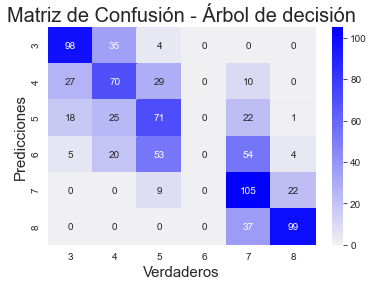

Accuracy obtenida por modelo de clasificación de ARBOL DE DECISION: 54.16 %


In [124]:
Y_predic_dt = best_tree.predict(X_test)
CM_dt=confusion_matrix(Y_test,Y_predic_dt)
columnas = [3,4,5,6,7,8]
df_CM_dt = pd.DataFrame(CM_dt,index=columnas,columns=columnas)
grafica = sns.heatmap(df_CM_dt, cmap=sns.color_palette("light:b",as_cmap=True,), annot=True,fmt='g')
plt.title('Matriz de Confusión - Árbol de decisión',fontsize=20)
plt.ylabel('Predicciones',fontsize=15)
plt.xlabel('Verdaderos',fontsize=15)
plt.show()

print("Accuracy obtenida por modelo de clasificación de ARBOL DE DECISION:",round(DecisionTreeClassifierScore*100, 2),'%')

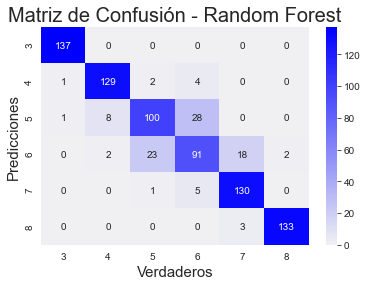

Accuracy obtenida por modelo de clasificación de RANDOM FOREST: 88.02 %


In [125]:
#RandombF
Y_predic_rf = best_rf.predict(X_test)
CM_rf=confusion_matrix(Y_test,Y_predic_rf)
df_CM_rf = pd.DataFrame(CM_rf,index=columnas,columns=columnas)
grafica = sns.heatmap(df_CM_rf, cmap=sns.color_palette("light:b",as_cmap=True,), annot=True,fmt='g')
plt.title('Matriz de Confusión - Random Forest',fontsize=20)
plt.ylabel('Predicciones',fontsize=15)
plt.xlabel('Verdaderos',fontsize=15)
plt.show()
print("Accuracy obtenida por modelo de clasificación de RANDOM FOREST:",round(RandomForestClassifierScore*100,2),'%')

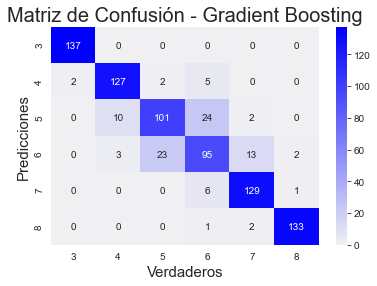

Accuracy obtenida por modelo de clasificación de GRADIENT BOOSTING: 88.26 %


In [154]:
#GrandientBosting
Y_predic_gb = gb_ajustado.predict(X_test)
CM_gb=confusion_matrix(Y_test,Y_predic_gb)
df_CM_gb = pd.DataFrame(CM_gb,index=columnas,columns=columnas)
grafica = sns.heatmap(df_CM_gb, cmap=sns.color_palette("light:b",as_cmap=True,), annot=True,fmt='g')
plt.title('Matriz de Confusión - Gradient Boosting',fontsize=20)
plt.ylabel('Predicciones',fontsize=15)
plt.xlabel('Verdaderos',fontsize=15)
plt.show()
print("Accuracy obtenida por modelo de clasificación de GRADIENT BOOSTING:",round(GrandientBoostingClassifierScore*100,2),'%')

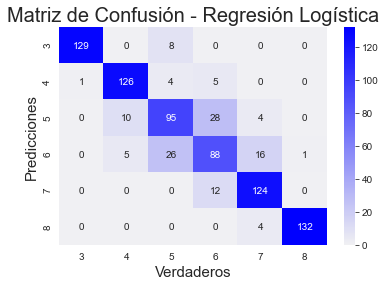

Accuracy obtenida por modelo de clasificación de REGRESIÓN LOGÍSTICA: 84.84 %


In [159]:
#Regresion Logistica
rl_ajustado.fit(X_train_scaler, Y_train)
DecisionRLScore = rl_ajustado.score(X_test_scaler,Y_test)
Y_predic_rl = rl_ajustado.predict(X_test_scaler)
CM_rl=confusion_matrix(Y_test,Y_predic_rl)
df_CM_rl = pd.DataFrame(CM_rl,index=columnas,columns=columnas)
grafica = sns.heatmap(df_CM_rl, cmap=sns.color_palette("light:b",as_cmap=True,), annot=True,fmt='g')
plt.title('Matriz de Confusión - Regresión Logística',fontsize=20)
plt.ylabel('Predicciones',fontsize=15)
plt.xlabel('Verdaderos',fontsize=15)
plt.show()
print("Accuracy obtenida por modelo de clasificación de REGRESIÓN LOGÍSTICA:",round(DecisionRLScore*100,2),'%')

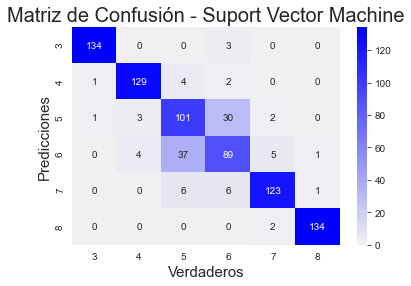

Accuracy obtenida por modelo de clasificación de REGRESIÓN LOGÍSTICA: 86.8 %


In [167]:
#SVM
Y_predic_svm = best_svm.predict(X_test_scaler)
CM_svm=confusion_matrix(Y_test,Y_predic_svm)
df_CM_svm = pd.DataFrame(CM_svm,index=columnas,columns=columnas)
grafica = sns.heatmap(df_CM_svm,cmap=sns.color_palette("light:b",as_cmap=True,), annot=True,fmt='g')
plt.title('Matriz de Confusión - Suport Vector Machine',fontsize=20)
plt.ylabel('Predicciones',fontsize=15)
plt.xlabel('Verdaderos',fontsize=15)
plt.show()
print("Accuracy obtenida por modelo de clasificación de REGRESIÓN LOGÍSTICA:",round(DecisionSVCScore*100,2),'%')

Como conclusión podemos observar que que el alogortimo de machine learning con el mayor accuracy en sus predicciones es Random Forest con un 87,29% (muy parecido a SVM con un 86,31%). Este valor puede resultar no muy elevado ya que comunmente se pretende obtener valores de accuracy por arriba del 95% en los algoritmos de predicción, pero hay que tener en cuenta que el presente problema no consta de una clasifiación binaria sino que de 6 tipos de clasifiación distinta (Quality = 3,4,5,6,7 y 8) por lo que aumenta la dificultad de la predicción. 

Analizamos brevemente a que features el modelo de Random Forest le dio más importancia para hacer las predicciones

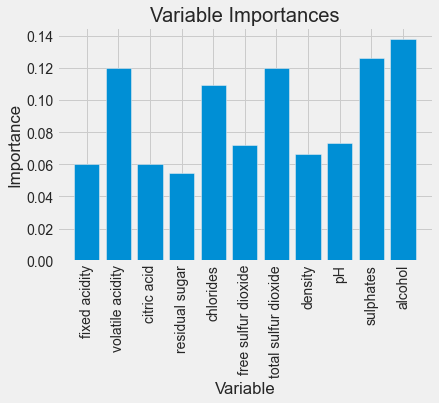

In [173]:
feature_list = df.columns
feature_list= feature_list.drop('quality')
feature_list

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Del gráfico se deduce que las features "volatile acidity", "Chlorides", "total sulfur dioxide", "sulphates" y "alcohol" tienen una mayor relevancia que el resto pero sin ser muy grade por lo que el algoritmos tiene en cuenta practicamente todas las features para poder predecir resultados. 